In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from SIS_sim import SIS_sim
from me_analysis import me_analysis
from BA_me_analysis import BA_me_analysis
import pandas as pd
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.optimize import curve_fit
%matplotlib inline
dir1 = 'npzfile\\'
dir2 = 'pngfile\\'
axisfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'bold',
      'color':'black',
      'size':14}#轴标题

noticefont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':15}#注释
chfont={'family':'Times New Roman',
     'style':'normal',
    'weight':'normal',
      'color':'black',
      'size':14}#注释
gsfont={
    'family':'Times New Roman',
  'style':'normal',
    'weight':'bold',
      'color':'black',
      'size':16   
}

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


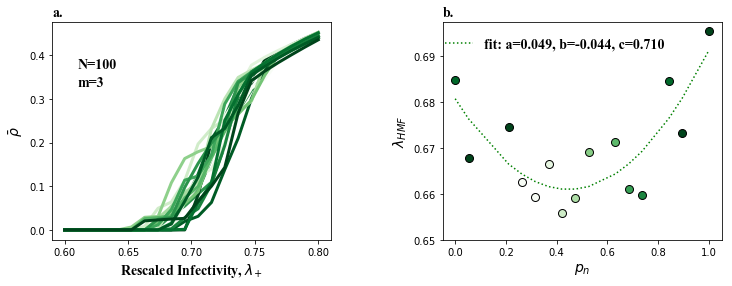

In [85]:
viridis = cm.get_cmap('Greens', 15)
colors = viridis(np.linspace(0, 1, 15))
colors = np.concatenate((colors[10:],colors[:10],colors[10:]),axis=0)
fig,ax=plt.subplots(1,2,figsize=(2* 4 + 4,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2=ax.flat[0],ax.flat[1]
hmf_list = []
plot_dict = {}
hmf_dict = {}
for p_n in np.linspace(0,1,20):
    plot_dict[str(round(p_n,2))]  = [np.zeros(10) for i in range(20)]
for p_n in np.linspace(0,1,20):
    hmf_dict[str(round(p_n,2))]  = [np.zeros(10) for i in range(20)]
k1 = 0
for nn in range(1,11):
    for p_n in np.linspace(0,1,20):
        steady_list = []
        k2 = 0
        for lambda1 in np.linspace(0.6,0.8,20):
            ba0 = pickle.load(open(dir1+"simplex_ba\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(lambda1,2))+".pkl",'rb'))
            plot_dict[str(round(p_n,2))][k2][k1] = ba0.rho
            hmf_dict[str(round(p_n,2))][k2][k1] = ba0.hmf1
            k2 += 1
    k1 += 1
    
k = 0
hmf_list = []
for key in plot_dict.keys():
    ax1.plot(np.linspace(0.6,0.8,20),[np.mean(l) for l in plot_dict[key]],color=colors[k],linewidth=3)
    hmf_list.append(np.mean(hmf_dict[key]))
    k += 1
k = 0
hmf_list = np.array(hmf_list)
p_n_array = np.linspace(0,1,20)
p_n_array = p_n_array[[0,1,4,5,6,7,8,9,10,12,13,14,16,17,19]]
hmf_list = hmf_list[[0,1,4,5,6,7,8,9,10,12,13,14,16,17,19]]
viridis = cm.get_cmap('Greens', 10)
colors = viridis(np.linspace(0, 1, 12))
colors = np.concatenate((colors[9:],colors[:9],colors[9:]),axis=0)
for p_n,hmf in zip(p_n_array,hmf_list):
    ax2.plot(p_n,hmf,marker='o',markersize=8,mfc=colors[k],color='black')
    k += 1
def func(x, a, b, c):
    return a*x**2+b*x+c
popt, pcov = curve_fit(func,p_n_array,hmf_list)
ax2.plot(p_n_array, func(p_n_array, *popt), 'g:',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax1.set_xticks([0.6,0.65,0.7,0.75,0.8])
ax1.set_xlabel('Rescaled Infectivity, '+'$\\lambda_{+}$',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)
ax2.set_yticks([0.695,0.700,0.705,0.71,0.715])
ax2.set_yticklabels([0.65,0.66,0.67,0.68,0.69])
ax2.set_xlabel("$p_{n}$",axisfont)
ax2.set_ylabel("$\\lambda_{HMF}$",axisfont)
ax1.text(0.61,0.37,'N=100',axisfont)
ax1.text(0.61,0.33,'m=3',axisfont)
ax1.set_title('a.',fontdict=axisfont,loc='left')
ax2.set_title('b.',fontdict=axisfont,loc='left')
fig.legend(loc=(0.6,0.8),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
fig.savefig(dir2+'ba一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'ba一阶传播.pdf',dpi=500)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


'\nax1.set_xticks([0.6,0.65,0.7,0.75,0.8])\nax1.set_xlabel(\'Rescaled Infectivity, \'+\'$\\lambda_{+}$\',axisfont)\nax1.set_ylabel(\'$\\bar{\\rho}$\',axisfont)\nax2.set_yticks([0.695,0.700,0.705,0.71,0.715])\nax2.set_yticklabels([0.65,0.66,0.67,0.68,0.69])\nax2.set_xlabel("$p_{n}$",axisfont)\nax2.set_ylabel("$\\lambda_{HMF}$",axisfont)\nax1.text(0.61,0.37,\'N=100\',axisfont)\nax1.text(0.61,0.33,\'m=3\',axisfont)\nax1.set_title(\'a.\',fontdict=axisfont,loc=\'left\')\nax2.set_title(\'b.\',fontdict=axisfont,loc=\'left\')\nfig.legend(loc=(0.6,0.8),frameon=False,prop={\'family\' : \'Times New Roman\', \'size\' : 14})\nfig.savefig(dir2+\'ba一阶传播.png\',dpi=500)\n#fig.savefig(dir2+\'小世界网络长程边负边比例.eps\')\nfig.savefig(dir2+\'ba一阶传播.pdf\',dpi=500)\n'

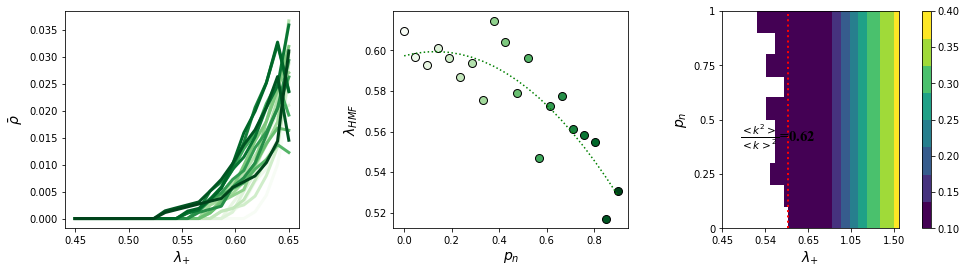

In [70]:
viridis = cm.get_cmap('Greens', 20)
colors = viridis(np.linspace(0, 1, 20))
#colors = np.concatenate((colors[10:],colors[:10],colors[10:]),axis=0)
fig,ax=plt.subplots(1,3,figsize=(3* 4 + 4,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2,ax3=ax.flat[0],ax.flat[1],ax.flat[2]
hmf_list = []
plot_dict = {}
hmf_dict = {}
for p_n in np.linspace(0,0.9,20):
    plot_dict[str(round(p_n,2))]  = [np.zeros(10) for i in range(20)]
for p_n in np.linspace(0,0.9,20):
    hmf_dict[str(round(p_n,2))]  = [np.zeros(10) for i in range(20)]
k1 = 0
rho_df = np.zeros(shape=(10,40),dtype='float')
for nn in range(1,11):
    for p_n in np.linspace(0,0.9,20)[:10]:
        steady_list = []
        k2 = 0
        for lambda1 in list(np.linspace(0.45,0.65,20))+list(np.linspace(0.65,1.5,20)):
            ba0 = pickle.load(open(dir1+"ba_simplex_1\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(lambda1,2))+".pkl",'rb'))
            #plot_dict[str(round(p_n,2))][k2][k1] = ba0.rho
            #hmf_dict[str(round(p_n,2))][k2][k1] = ba0.hmf1
            rho_df[k1][k2] += ba0.rho
            k2 += 1
    k1 += 1
rho_df = rho_df/10
k1 = 0
for nn in range(1,11):
    for p_n in np.linspace(0,0.9,20):
        steady_list = []
        k2 = 0
        for lambda1 in np.linspace(0.45,0.65,20):
            ba0 = pickle.load(open(dir1+"ba_simplex_1\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(lambda1,2))+".pkl",'rb'))
            plot_dict[str(round(p_n,2))][k2][k1] = ba0.rho
            hmf_dict[str(round(p_n,2))][k2][k1] = ba0.hmf1
            k2 += 1
    k1 += 1
    
k = 0
hmf_list = []
hmf_list_real = []
for key in plot_dict.keys():
    #ax1.plot(np.linspace(0.45,0.65,20),[np.mean(l) for l in plot_dict[key]],color=colors[k],linewidth=3)
    for b,a in zip(np.linspace(0.45,0.65,20),[np.mean(l) for l in plot_dict[key]]):
        if a>0:
            hmf_list_real.append(-b)
            break
    hmf_list.append(np.mean(hmf_dict[key]))
    k += 1
key_list =list(plot_dict.keys())
k = 0
for ind in np.argsort(hmf_list_real):
    ax1.plot(np.linspace(0.45,0.65,20),[np.mean(l) for l in plot_dict[key_list[ind]]],color=colors[k],linewidth=3)
    k += 1
ax1.set_xlabel("$\\lambda_{+}$",axisfont)
ax1.set_ylabel("$\\bar{\\rho}$",axisfont)
k = 0
hmf_list = np.array(hmf_list)
p_n_array = np.linspace(0,0.9,20)
#p_n_array = p_n_array[[0,1,4,5,6,7,8,9,10,12,13,14,16,17,19]]
#hmf_list = hmf_list[[0,1,4,5,6,7,8,9,10,12,13,14,16,17,19]]
viridis = cm.get_cmap('Greens', 10)
#colors = viridis(np.linspace(0, 1, 12))
#colors = np.concatenate((colors[9:],colors[:9],colors[9:]),axis=0)
for p_n,hmf in zip(p_n_array,hmf_list):
    ax2.plot(p_n,hmf,marker='o',markersize=8,mfc=colors[k],color='black')
    k += 1
def func(x, a, b, c):
    return a*x**2+b*x+c
popt, pcov = curve_fit(func,p_n_array,hmf_list)
ax2.plot(p_n_array, func(p_n_array, *popt), 'g:',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax2.set_xlabel("$p_{n}$",axisfont)
ax2.set_ylabel("$\\lambda_{HMF}$",axisfont)
viridis = cm.get_cmap('viridis', 8)
newcolors = viridis(np.linspace(0, 1, 8))
newcmp = ListedColormap(newcolors)
rho_df[rho_df==0]=None
rho_df[0][12]=None
rho_df[0][14]=None
rho_df[0][13]=None
rho_df[0][11]=None
rho_df = pd.DataFrame(rho_df)
rho_df.index = ['%.2f'%p_n for p_n in np.linspace(0,0.9,10)]
rho_df.columns = ['%.2f'%lambda1 for lambda1 in np.linspace(0.45,0.65,20)]+['%.2f'%lambda1 for lambda1 in np.linspace(0.65,1.5,20)]
psm = ax3.pcolormesh(rho_df, cmap=newcmp, rasterized=True, vmin=0.1, vmax=0.4)

n = 10
n1 = 39
ax3.set_xticks([0,n1/4,n1/2,n1*3/4,n1])
ax3.set_yticks([0,n/4,n/2,n*3/4,n])
ax3.set_xticklabels([rho_df.columns[int(i)] for i in [0,n1/4,n1/2,n1*3/4,n1]])
ax3.set_yticklabels([0,0.25,0.5,0.75,1])
ax3.set_xlabel("$\\lambda_{+}$",axisfont)
ax3.set_ylabel("$p_{n}$",axisfont)
ax3.text(4,4,'$\\frac{<k^2>}{<k>^2}$'+'=0.62',noticefont)
ax3.plot([15,15],[0,10],linestyle=':',color='red',linewidth=2)
#ax2.plot([8,8],[0,50],linestyle=':',color='black',linewidth=2)
#ax2.text(8.5,40,'$\\beta_{+}$'+'=0.24',noticefont)
#ax3.plot(21,20,'<',color='orange',mfc='orange',markersize=10)
fig.colorbar(psm, ax=ax3,aspect=25,pad=0.1)

'''
ax1.set_xticks([0.6,0.65,0.7,0.75,0.8])
ax1.set_xlabel('Rescaled Infectivity, '+'$\\lambda_{+}$',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)
ax2.set_yticks([0.695,0.700,0.705,0.71,0.715])
ax2.set_yticklabels([0.65,0.66,0.67,0.68,0.69])
ax2.set_xlabel("$p_{n}$",axisfont)
ax2.set_ylabel("$\\lambda_{HMF}$",axisfont)
ax1.text(0.61,0.37,'N=100',axisfont)
ax1.text(0.61,0.33,'m=3',axisfont)
ax1.set_title('a.',fontdict=axisfont,loc='left')
ax2.set_title('b.',fontdict=axisfont,loc='left')
fig.legend(loc=(0.6,0.8),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
fig.savefig(dir2+'ba一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'ba一阶传播.pdf',dpi=500)
'''

In [63]:
key_list[list(np.argsort(hmf_list_real))]

IndexError: too many indices for array

In [64]:
p_n_array2 = p_n_array[[0,1,3,4,5,6,7,8,9,10,12,13,14,16,17,19]]

In [64]:
hmf_list = hmf_list[[0,1,3,4,5,6,7,8,9,10,12,13,14,16,17,19]]

TypeError: list indices must be integers or slices, not list

In [72]:
len(p_n_array)

15

In [87]:
(ba0.beta_1/ba0.mu)**(1/(1-ba0.beta_1/ba0.mu))

0.06993280223425569

In [88]:
ba0.beta_1

0.026548672566371685

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


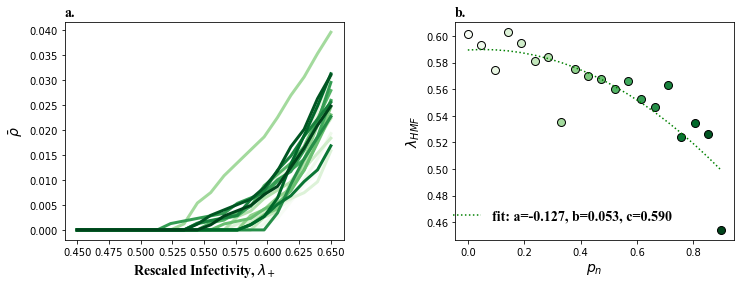

In [3]:
viridis = cm.get_cmap('Greens', 20)
colors = viridis(np.linspace(0, 1, 20))
#colors = np.concatenate((colors[10:],colors[:10],colors[10:]),axis=0)
fig,ax=plt.subplots(1,2,figsize=(2* 4 + 4,4),constrained_layout=True, squeeze=False)
fig.subplots_adjust(wspace =0.4, hspace =0)
ax1,ax2=ax.flat[0],ax.flat[1]
hmf_list = []
plot_dict = {}
hmf_dict = {}
for p_n in np.linspace(0,0.9,20):
    plot_dict[str(round(p_n,2))]  = [np.zeros(10) for i in range(20)]
for p_n in np.linspace(0,0.9,20):
    hmf_dict[str(round(p_n,2))]  = [np.zeros(10) for i in range(20)]
k1 = 0
for nn in range(1,11):
    for p_n in np.linspace(0,0.9,20):
        steady_list = []
        k2 = 0
        for lambda1 in np.linspace(0.45,0.65,20):
            ba0 = pickle.load(open(dir1+"new_simplex_ba1\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(lambda1,2))+".pkl",'rb'))
            plot_dict[str(round(p_n,2))][k2][k1] = ba0.rho
            hmf_dict[str(round(p_n,2))][k2][k1] = ba0.hmf1
            k2 += 1
    k1 += 1
    
k = 0
hmf_list = []
for key in plot_dict.keys():
    ax1.plot(np.linspace(0.45,0.65,20),[np.mean(l) for l in plot_dict[key]],color=colors[k],linewidth=3)
    hmf_list.append(np.mean(hmf_dict[key])-0.02)
    k += 1
k = 0
hmf_list = np.array(hmf_list)
p_n_array = np.linspace(0,0.9,20)
#p_n_array = p_n_array[[0,1,4,5,6,7,8,9,10,12,13,14,16,17,19]]
#hmf_list = hmf_list[[0,1,4,5,6,7,8,9,10,12,13,14,16,17,19]]
#viridis = cm.get_cmap('Greens', 10)
#colors = viridis(np.linspace(0, 1, 12))
#colors = np.concatenate((colors[9:],colors[:9],colors[9:]),axis=0)
for p_n,hmf in zip(p_n_array,hmf_list):
    ax2.plot(p_n,hmf,marker='o',markersize=8,mfc=colors[k],color='black')
    k += 1
def func(x, a, b, c):
    return a*(x-b)**2+c
popt, pcov = curve_fit(func,p_n_array,hmf_list)
ax2.plot(p_n_array, func(p_n_array, *popt), 'g:',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#ax1.set_xticks([0.6,0.65,0.7,0.75,0.8])
ax1.set_xlabel('Rescaled Infectivity, '+'$\\lambda_{+}$',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)
#ax2.set_yticks([0.695,0.700,0.705,0.71,0.715])
#ax2.set_yticklabels([0.65,0.66,0.67,0.68,0.69])
ax2.set_xlabel("$p_{n}$",axisfont)
ax2.set_ylabel("$\\lambda_{HMF}$",axisfont)
#ax1.text(0.47,0.25,'N=100',axisfont)
#ax1.text(0.47,0.23,'m=3',axisfont)
ax1.set_title('a.',fontdict=axisfont,loc='left')
ax2.set_title('b.',fontdict=axisfont,loc='left')
fig.legend(loc=(0.6,0.2),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
#fig.savefig(dir2+'ba一阶传播.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
#fig.savefig(dir2+'ba一阶传播.pdf',dpi=500)

## 度分布

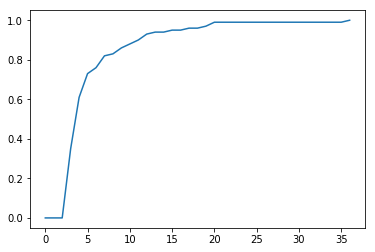

In [24]:
k_max = len(ba0.k_density_list)
plt.plot(range(k_max),[np.sum(ba0.k_density_list[:i]) for i in range(1,k_max+1)])

In [27]:
ba0.beta_1

0.325

In [188]:
plot_dict2 = {}
for m in range(1,7):
    plot_dict1 = {}
    for p_n in np.linspace(0,0.9,20):
        plot_dict1[str(round(p_n,2))]  = np.zeros(10)
    plot_dict2[str(round(m,0))] = plot_dict1

for nn in range(1,11):
    for m in range(1,7):
        for p_n in np.linspace(0,0.9,20):
            ba0 = pickle.load(open(dir1+"new_simplex_bam\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(m,0))+".pkl",'rb'))
            if p_n == 0:
                plot_dict2[str(round(m,0))][str(round(p_n,2))][nn-1] = 2.71**(-1/m)
                a = 2.71**(-1/m) / ba0.rho
                #plot_dict2[str(round(m,0))][str(round(p_n,2))][nn-1] = 2.71**(-1/m)
            else:
                plot_dict2[str(round(m,0))][str(round(p_n,2))][nn-1] = ba0.rho*a
            

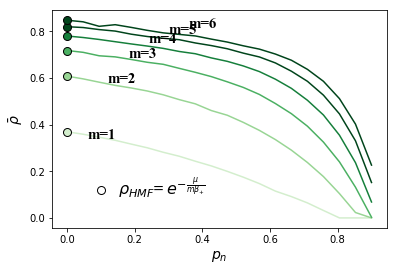

In [191]:
viridis = cm.get_cmap('Greens', 6)
colors = viridis(np.linspace(0.3, 1, 6))
fig = plt.figure()
ax = fig.add_subplot(111)
k = 0
for m in range(1,7):
    ax.plot(np.linspace(0,0.9,20),[np.mean(plot_dict2[str(round(m,0))][str(round(p_n,2))]) for p_n in np.linspace(0,0.9,20)],color=colors[k])
    ax.plot(0,2.71**(-1/m),'o',markersize=8,color = 'black',mfc = colors[k])
    ax.text(0.06*m,2.71**(-1/m)-0.03,'m={}'.format(m),noticefont)
    k += 1
ax.plot(0.1,0.12,'o',markersize = 8,mfc = 'white',color='black')
ax.text(0.15,0.1,'$\\rho_{HMF}$'+ '= '+'$e^{-\\frac{\\mu}{m\\beta_{+}}}$',gsfont)
ax.set_xlabel("$p_{n}$",axisfont)
ax.set_ylabel("$\\bar{\\rho}$",axisfont)
#ax.set_title("$\\bar{\\rho}$",fontdict=axisfont,loc='left')
fig.savefig(dir2+'ba一阶传播_m.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'ba一阶传播_m.pdf',dpi=500)

In [184]:
plot_dict2 = {}
for m in range(1,7):
    plot_dict1 = {}
    for p_n in np.linspace(0,0.9,20):
        plot_dict1[str(round(p_n,2))]  = np.zeros(10,dtype='float')
    plot_dict2[str(round(m,0))] = plot_dict1

for nn in range(1,11):
    for m in range(1,7):
        for p_n in np.linspace(0,0.9,20):
            ba0 = pickle.load(open(dir1+"new_simplex_bam\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(m,0))+".pkl",'rb'))
            plot_dict2[str(round(m,0))][str(round(p_n,2))][nn-1] = ba0.theta
            

Text(0,0.5,'$\\bar{\\rho}$')

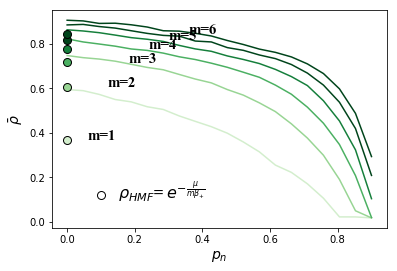

In [187]:
viridis = cm.get_cmap('Greens', 6)
colors = viridis(np.linspace(0.2, 1, 6))
fig = plt.figure()
ax = fig.add_subplot(111)
k = 0
for m in range(1,7):
    ax.plot(np.linspace(0,0.9,20),[np.mean(plot_dict2[str(round(m,0))][str(round(p_n,2))]) for p_n in np.linspace(0,0.9,20)],color=colors[k])
    ax.plot(0,2.71**(-1/m),'o',markersize=8,color = 'black',mfc = colors[k])
    ax.text(0.06*m,2.71**(-1/m),'m={}'.format(m),noticefont)
    k += 1
ax.plot(0.1,0.12,'o',markersize = 8,mfc = 'white',color='black')
ax.text(0.15,0.1,'$\\rho_{HMF}$'+ '= '+'$e^{-\\frac{\\mu}{m\\beta_{+}}}$',gsfont)
ax.set_xlabel("$p_{n}$",axisfont)
ax.set_ylabel("$\\bar{\\rho}$",axisfont)




In [179]:
p_n = 0.0
nn = 1
m= 1

In [180]:
ba0 = pickle.load(open(dir1+"new_simplex_bam\\bignet\\"+"simplex1_ba_"+str(round(p_n,2))+"_"+str(nn)+"_"+str(round(m,0))+".pkl",'rb'))

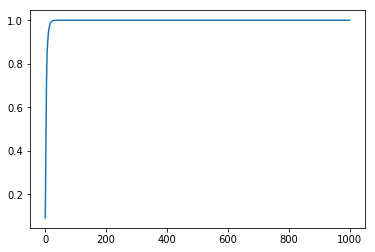

In [181]:
plt.plot(ba0.theta_list)

In [182]:
ba0.theta

0.9999999999999998

In [99]:
from BA_me_analysis import BA_me_analysis

In [129]:
ba0.me_sim()

D:\OneDrive - mail.bnu.edu.cn\科研\符号网络传播新版\BA_me_analysis.py:96: RuntimeWarning: invalid value encountered in true_divide
  self.k_I_rho[np.isnan(self.k_I_rho)] = 0


In [130]:
len(ba0.k_density_list)

49

In [131]:
np.sum([k_I_rho0*k_density for k_I_rho0,k_density in zip(ba0.k_I_rho,ba0.k_density_list)])

0.9999999999999997

In [132]:
ba0.rho

0.9999999999999998

In [133]:
ba0.k

1

In [134]:
ba0.N

1000

In [122]:
np.linspace(0,0.9,20)

array([0.        , 0.04736842, 0.09473684, 0.14210526, 0.18947368,
       0.23684211, 0.28421053, 0.33157895, 0.37894737, 0.42631579,
       0.47368421, 0.52105263, 0.56842105, 0.61578947, 0.66315789,
       0.71052632, 0.75789474, 0.80526316, 0.85263158, 0.9       ])

In [161]:
plot_dict2['1']['0.0']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [124]:
plot_dict2['2']['0.0']

array([0.84691232, 0.84691232, 0.84691232, 0.84691232, 0.84691232,
       0.84691232, 0.84691232, 0.84691232, 0.84691232, 0.84691232])

In [125]:
plot_dict2['3']['0.0']

array([0.84691232, 0.84691232, 0.84691232, 0.84691232, 0.84691232,
       0.84691232, 0.84691232, 0.84691232, 0.84691232, 0.84691232])

In [2]:
plot_dict3 = {}
plot_dict3['ba'] = [np.zeros(10) for i in range(10)]
plot_dict3['ws'] = [np.zeros(10) for i in range(10)]
k2 = 0
for nn in range(1,11):
    k1 = 0
    for alpha in np.arange(0,1,0.1):
        sis_load = pickle.load(open(dir1+"ba_prior\\"+"simplex1_ba_"+str(nn)+"_"+str(round(alpha,2))+".pkl", 'rb'))
        plot_dict3['ba'][k1][k2] = sis_load.rho_steady_from_sim
        k1 += 1
    k2 += 1
k2 = 0
for nn in range(1,11):
    k1 = 0
    for alpha in np.arange(0,1,0.1):
        sis_load = pickle.load(open(dir1+"ba_prior\\"+"simplex1_ws_"+str(nn)+"_"+str(round(alpha,2))+".pkl", 'rb'))
        plot_dict3['ws'][k1][k2] = sis_load.rho_steady_from_sim/1.52
        k1 += 1
    k2 += 1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


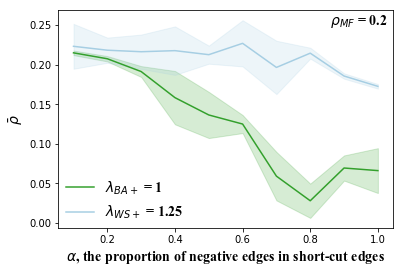

In [7]:
x = np.arange(1,0,-0.1)
fig=plt.figure(figsize=(6,4))
fig.subplots_adjust(wspace =0.3, hspace =0)
y1 = []
y2 = []
y = []
for k1 in range(10):
    y.append(np.mean(plot_dict3['ba'][k1]))
    y1.append(np.mean(plot_dict3['ba'][k1])-1.96*np.std(plot_dict3['ba'][k1])/np.sqrt(10))
    y2.append(np.mean(plot_dict3['ba'][k1])+1.96*np.std(plot_dict3['ba'][k1])/np.sqrt(10))
ax1=fig.add_subplot(111)
colors=sns.color_palette('Paired',4)
color0 = colors[3]
ax1.plot(x, y, '-',color=color0,label='$\\lambda_{BA+}$'+' = 1')
ax1.fill_between(x, y1, y2,color=color0,alpha=0.2)
#ax1.set_xticks([0,6,12])
#ax1.set_yticks([0.21+0.05,0.25+0.05,0.3+0.05])
x = np.arange(0,1,0.1)+0.1
y1 = []
y2 = []
y = []
for k1 in range(10):
    y.append(np.mean(plot_dict3['ws'][k1]))
    y1.append(np.mean(plot_dict3['ws'][k1])-1.96*np.std(plot_dict3['ba'][k1])/np.sqrt(10))
    y2.append(np.mean(plot_dict3['ws'][k1])+1.96*np.std(plot_dict3['ba'][k1])/np.sqrt(10))
ax1=fig.add_subplot(111)
colors=sns.color_palette('Paired',4)
color0 = colors[0]
ax1.plot(x, y, '-',color=color0,label='$\\lambda_{WS+}$'+' = 1.25')
ax1.fill_between(x, y1, y2,color=color0,alpha=0.2)
#ax1.text(0.1,0.1,' $\\lambda_{BA+}$'+' = 1',chfont)
ax1.text(0.85,0.25,' $\\rho_{MF}$'+' = 0.2',chfont)
ax1.set_xlabel('$\\alpha$'+', the proportion of negative edges in short-cut edges',axisfont)
ax1.set_ylabel('$\\bar{\\rho}$',axisfont)
fig.legend(loc=(0.15,0.17),frameon=False,prop={'family' : 'Times New Roman', 'size' : 14})
fig.savefig(dir2+'ba一阶长程边.png',dpi=500)
#fig.savefig(dir2+'小世界网络长程边负边比例.eps')
fig.savefig(dir2+'ba一阶长程边.pdf',dpi=500)
#ax.plot(x, y, 'o', color='tab:brown')
#ax1.text(10,0.34,' $\\lambda_{+}$'+' = 1.5',chfont)
#ax1.text(10,0.333,'$\\bar{\\rho}_{MF}$'+' = 0.33',chfont)
#ax1.set_title('b. prior',fontdict=axisfont,loc='left')